In [2]:
import matplotlib.pyplot as plt
from math import floor, factorial

In [3]:
def runge_kutta_edo2(Fx, a, b, y0, y1, N, Px, Qx, n):
    '''Función que resuelve la EDO2 de la forma y'' + p(x)y' + q(x)y = f(x) utilizando el método de Runge-Kutta de orden 4.
    
    INPUTS:
    - Fx: función f(x)
    - a, b: extremos del intervalo 
    - y0, y1: condiciones iniciales para y(a) y y'(a)
    - N: número de subintervalos
    - Px, Qx: funciones p(x) y q(x)
    - n: parámetro de la función q(x)
    '''

    h = (b-a)/N  # paso

    x = [a]
    u = [y0]  # u(x) = y(x)
    v = [y1]  # v(x) = y'(x)

    for k in range(N):
        x_k = x[k]
        u_k = u[k]
        v_k = v[k]

        # Runge-Kutta de orden 4
        k1_u = h * v_k
        k1_v = h * (-Px(x_k) * v_k - Qx(x_k, n) * u_k + Fx(x_k))

        k2_u = h * (v_k + 0.5 * k1_v)
        k2_v = h * (-Px(x_k + 0.5 * h) * (v_k + 0.5 * k1_v) - Qx(x_k + 0.5 * h, n) * (u_k + 0.5 * k1_u) + Fx(x_k + 0.5 * h))

        k3_u = h * (v_k + 0.5 * k2_v)
        k3_v = h * (-Px(x_k + 0.5 * h) * (v_k + 0.5 * k2_v) - Qx(x_k + 0.5 * h, n) * (u_k + 0.5 * k2_u) + Fx(x_k + 0.5 * h))

        k4_u = h * (v_k + k3_v)
        k4_v = h * (-Px(x_k + h) * (v_k + k3_v) - Qx(x_k + h, n) * (u_k + k3_u) + Fx(x_k + h))

        # Actualizar valores utilizando la fórmula de Runge-Kutta
        x.append(x_k + h)
        u.append(u_k + (k1_u + 2 * k2_u + 2 * k3_u + k4_u) / 6)
        v.append(v_k + (k1_v + 2 * k2_v + 2 * k3_v + k4_v) / 6)

    return x, u, v


## Ejemplo 1
$$ y'' + y' + y = 1$$

$
\begin{cases}
    y(0) = 0 \\
    y'(0) = 1
\end{cases}
$

In [10]:
# EDO2: y'' + P(x)y' + Q(x,n)y = f(x)

def f(x):
    return 1

def P(x):
    '''polinomio que acompaña a y' en la EDO2'''
    return 1

def Q(x, n):
    '''polinomio que acompaña a y en la EDO2'''
    return 1


#condiciones iniciales
a = 0
b = 5
y0 = 0
y1 = 1
N = 50  # la mitad de intervalos

valores_x_ej1, sol_y_ej1, sol_y1_ej1 = runge_kutta_edo2(f, a, b, y0, y1, N, P, Q, n=0)

VALOR ÚLTIMO PUNTO (Sol. Numérica Runge-Kutta):
x = 4.999999999999998
y(x) = 0.9866477759472104


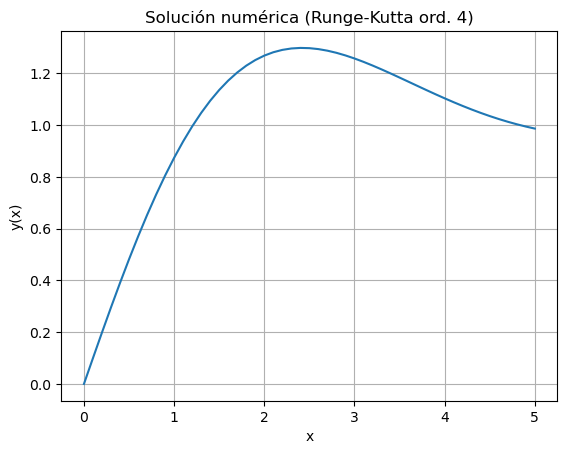

In [17]:
# VALORES resultados
print('VALOR ÚLTIMO PUNTO (Sol. Numérica Runge-Kutta):')
print(f'x = {valores_x_ej1[-1]}')
print(f'y(x) = {sol_y_ej1[-1]}')


# GRAFICAR RESULTADOS
plt.plot(valores_x_ej1, sol_y_ej1)
#plt.plot(valores_x_rk, sol_y_1_rk, label='Derivada de la solución (Runge-Kutta)')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Solución numérica (Runge-Kutta ord. 4)')
plt.grid(True)
plt.show()

## Ejemplo 2: Ecuación Bessel
$$y'' + \frac{1}{x}y' + \left(1-\frac{n^2}{x^2}\right) y = 0$$
$n=0,1,2,3,...$  
  
$
\begin{cases}
    y(0.1) = 0 \\
    y'(0.1) = 1
\end{cases}
$


In [29]:
# EDO2: y'' + P(x)y' + Q(x,n)y = f(x)

def f(x):
    return 0

def P(x):
    '''polinomio que acompaña a y' en la EDO2'''
    return 1/x

def Q(x, n):
    '''polinomio que acompaña a y en la EDO2'''
    return (1 - (n/x)**2)


#condiciones iniciales
a = 0.1
b = 20
y0 = 0
y1 = 1
N = 100


n = 0

VALOR ÚLTIMO PUNTO (Sol. Numérica Runge-Kutta):
x = 20.000000000000025
y(x) = 0.04820075787952933


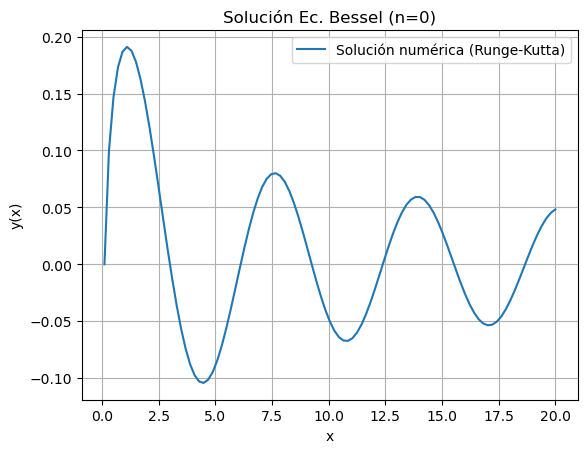

In [30]:
n = 0

valores_x_ej2_n0, sol_y_ej2_n0, sol_y1_ej2_n0 = runge_kutta_edo2(f, a, b, y0, y1, N, P, Q, n)


# VALORES resultados
print('VALOR ÚLTIMO PUNTO (Sol. Numérica Runge-Kutta):')
print(f'x = {valores_x_ej2_n0[-1]}')
print(f'y(x) = {sol_y_ej2_n0[-1]}')


# GRAFICAR RESULTADOS
plt.plot(valores_x_ej2_n0, sol_y_ej2_n0, label='Solución numérica (Runge-Kutta)')
#plt.plot(valores_x_rk, sol_y_1_rk, label='Derivada de la solución (Runge-Kutta)')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title(f'Solución Ec. Bessel (n={n})')
plt.legend()
plt.grid(True)
plt.show()

n = 1

VALOR ÚLTIMO PUNTO (Sol. Numérica Runge-Kutta):
x = 20.000000000000025
y(x) = 0.05910360030776628


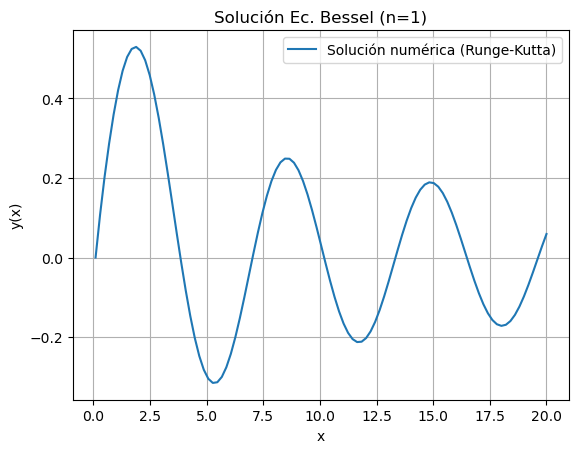

In [31]:
n = 1

valores_x_ej2_n1, sol_y_ej2_n1, sol_y1_ej2_n1 = runge_kutta_edo2(f, a, b, y0, y1, N, P, Q, n)


# VALORES resultados
print('VALOR ÚLTIMO PUNTO (Sol. Numérica Runge-Kutta):')
print(f'x = {valores_x_ej2_n1[-1]}')
print(f'y(x) = {sol_y_ej2_n1[-1]}')


# GRAFICAR RESULTADOS
plt.plot(valores_x_ej2_n1, sol_y_ej2_n1, label='Solución numérica (Runge-Kutta)')
#plt.plot(valores_x_rk, sol_y_1_rk, label='Derivada de la solución (Runge-Kutta)')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title(f'Solución Ec. Bessel (n={n})')
plt.legend()
plt.grid(True)
plt.show()

n = 2

VALOR ÚLTIMO PUNTO (Sol. Numérica Runge-Kutta):
x = 20.000000000000025
y(x) = -2.4241023654607536


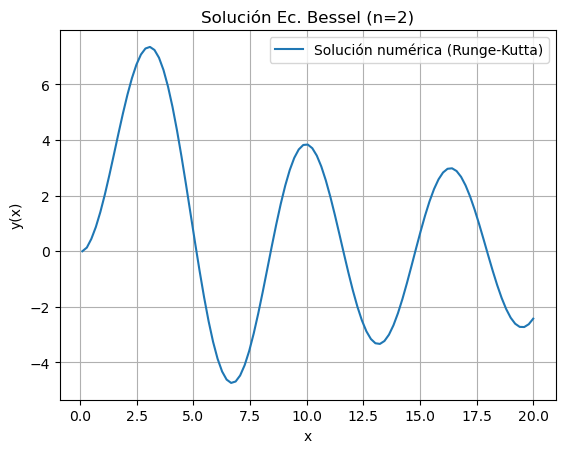

In [33]:
n = 2

valores_x_ej2_n2, sol_y_ej2_n2, sol_y1_ej2_n2 = runge_kutta_edo2(f, a, b, y0, y1, N, P, Q, n)


# VALORES resultados
print('VALOR ÚLTIMO PUNTO (Sol. Numérica Runge-Kutta):')
print(f'x = {valores_x_ej2_n2[-1]}')
print(f'y(x) = {sol_y_ej2_n2[-1]}')


# GRAFICAR RESULTADOS
plt.plot(valores_x_ej2_n2, sol_y_ej2_n2, label='Solución numérica (Runge-Kutta)')
#plt.plot(valores_x_rk, sol_y_1_rk, label='Derivada de la solución (Runge-Kutta)')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title(f'Solución Ec. Bessel (n={n})')
plt.legend()
plt.grid(True)
plt.show()

## Ejercicio 3: Ecuación de Legendre
$$ y'' - \frac{2x}{1-x^2}y' + \frac{n(n+1)}{1-x^2}y = 0 $$
$n=0,1,2,3,...$

$
\begin{cases}
    y(0) = 0 \\
    y'(0) = 1
\end{cases}
$

In [34]:
# EDO2: y'' + P(x)y' + Q(x,n)y = f(x)

def f(x):
    return 0

def P(x):
    '''polinomio que acompaña a y' en la EDO2'''
    return -(2*x)/(1-x**2)

def Q(x, n):
    '''polinomio que acompaña a y en la EDO2'''
    return n*(n+1)/(1-x**2)

#condiciones iniciales
a = 0
b = 1
y0 = 0
y1 = 1
N = 50  # la mitad de intervalos

n = 0, 1

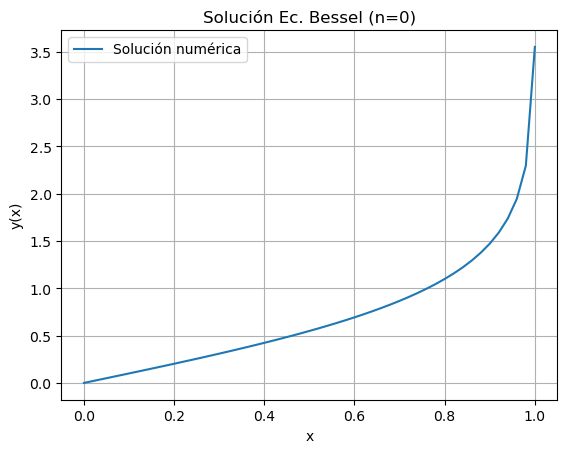

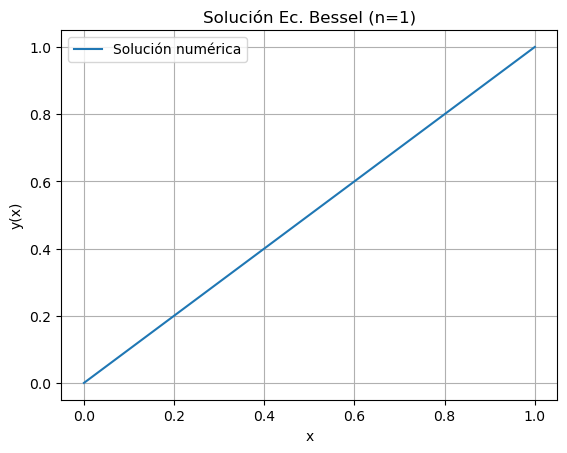

In [35]:
for n in range(2):
    valores_x, sol_y, sol_y_1 = runge_kutta_edo2(f, a, b, y0, y1, N, P, Q, n)
    plt.plot(valores_x, sol_y, label='Solución numérica')
    #plt.plot(valores_x, sol_y_1, label='Derivada de la solución')
    plt.xlabel('x')
    plt.ylabel('y(x)')
    plt.title(f'Solución Ec. Bessel (n={n})')
    plt.legend()
    plt.grid(True)
    plt.show()

## Ejemplo 4: Polinomios de Chebyshev de 1ª especie
$$ y'' - \frac{x}{1-x^2}y' + \frac{n^2}{1-x^2}y = 0 $$
$x\in [-1,1]$

$
\begin{cases}
    y(-1) = (-1)^n \\
    y'(-1) = \frac{n}{2} \sum_{k=0}^{[n/2]} (-1)^k \frac{(n-k-1)!}{m!(n-2k-1)!}(-2)^{n-2k-1} 
\end{cases}
$


In [32]:
# EDO2: y'' + P(x)y' + Q(x,n)y = f(x)

def f(x):
    return 0

def P(x):
    '''polinomio que acompaña a y' en la EDO2'''
    return x/(1-x**2)

def Q(x, n):
    '''polinomio que acompaña a y en la EDO2'''
    return n**2/(1-x**2)

# condiciones iniciales
a = -0.999
b = 0.999

def y0(n):
    return (-1)**n

def y1(n):
    return n/2 * sum( [ ((-1)**k) *((-2)**(n-2*k-1)) *factorial(n-k-1)/(factorial(k)*factorial(n-2*k-1)) for k in range(0, floor(n/2)) ] )

N = 100




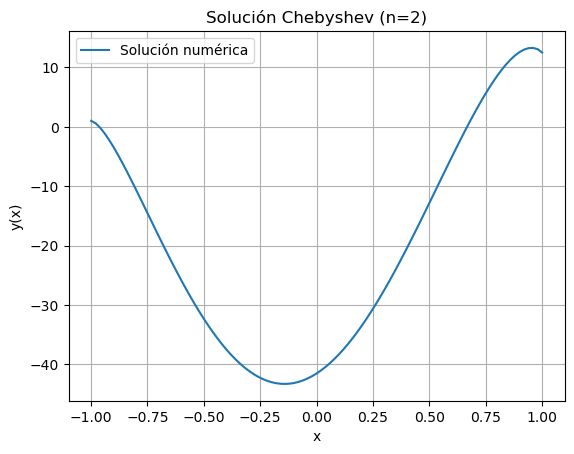

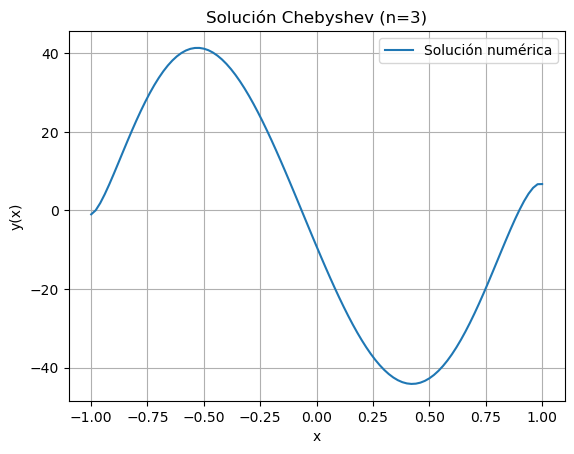

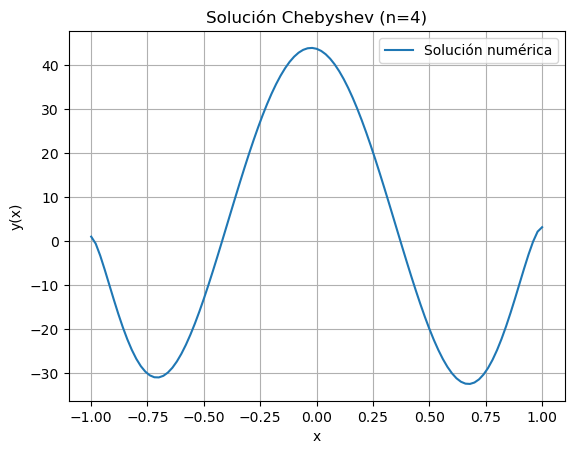

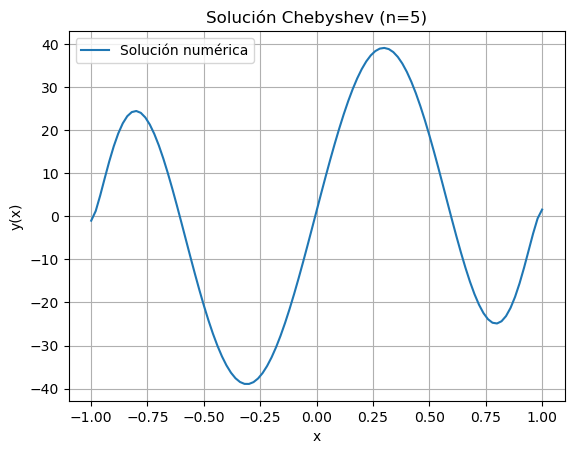

In [33]:
for n in range(2,6):
    valores_x, sol_y, sol_y_1 = runge_kutta_edo2(f, a, b, y0(n), y1(n), N, P, Q, n)
    plt.plot(valores_x, sol_y, label='Solución numérica')
    plt.xlabel('x')
    plt.ylabel('y(x)')
    plt.title(f'Solución Chebyshev (n={n})')
    plt.legend()
    plt.grid(True)
    plt.show()

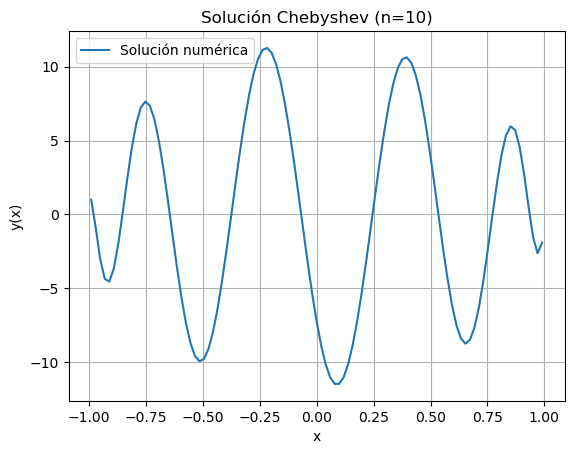

In [31]:
n = 10

alores_x, sol_y, sol_y_1 = runge_kutta_edo2(f, a, b, y0(n), y1(n), N, P, Q, n)
plt.plot(valores_x, sol_y, label='Solución numérica')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title(f'Solución Chebyshev (n={n})')
plt.legend()
plt.grid(True)
plt.show()

## Ejemplo 5: Ecuación Emden
$$ y'' + \frac{2}{x}y' + y^2 = 0 $$
$x\in [0,10]$

$
\begin{cases}
    y(0) = 1 \\
    y'(0) =0
\end{cases}
$

In [ ]:
# EDO2: y'' + P(x)y' + Q(x,n)y = f(x)

def f(x):
    return 0

def P(x):
    '''polinomio que acompaña a y' en la EDO2'''
    return 2/x

def Q(x, n):
    '''polinomio que acompaña a y en la EDO2'''
    return 1

# condiciones iniciales
a = 0.001
b = 10
y0 = 1
y1 = 0
N = 100

In [ ]:
from math import e, sqrt, sin, cos
def y(x):
    return e**x[cos(sqrt(2)*x)*[-x/(2*sqrt(2)) + 1/8)*sin(2sqrt(2)) + a]  + 1/4sin^3(sqrt(2)x)+b*sin(sqrt(2)x)]